#Heart Disease Prediction

Heart disease is one of the leading causes of death globally. Early prediction of heart-related issues can significantly increase the chances of timely treatment and survival. With the increasing availability of medical data, machine learning models can be used to assist healthcare professionals in identifying patients at risk.

In this project, we aim to build and evaluate several machine learning models to predict the presence of heart disease based on patients' clinical and demographic attributes such as age, blood pressure, cholesterol levels, chest pain type, and more.

We will follow these major steps:
- Data preprocessing and feature engineering
- Exploratory Data Analysis (EDA) to understand feature relationships
- Building and training multiple classification models
- Comparing the performance of different models
- Concluding the best model based on accuracy and evaluation metrics

By the end of this project, we will identify the most effective machine learning model for heart disease prediction and discuss potential improvements for future work.


In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
#load dataset
d=pd.read_csv('heart_disease.csv')
d.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar > 120mg/dl,Resting ECG,Max Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Heart Disease Presence
0,46,Male,Typical Angina,120,249,False,Normal,144,No,0.8,Downsloping,0,Reversible Defect,No Disease
1,51,Male,Typical Angina,140,261,False,Normal,186,Yes,0.0,Downsloping,0,Fixed Defect,Disease
2,51,Female,Non-anginal Pain,140,308,False,Normal,142,No,1.5,Downsloping,1,Fixed Defect,Disease
3,58,Female,Typical Angina,130,197,False,Having ST-T wave abnormality,131,No,0.6,Flat,0,Fixed Defect,Disease
4,50,Male,Non-anginal Pain,129,196,False,Having ST-T wave abnormality,163,No,0.0,Downsloping,0,Fixed Defect,Disease


In [6]:
# information of dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             500 non-null    int64  
 1   Sex                             500 non-null    object 
 2   Chest Pain Type                 500 non-null    object 
 3   Resting Blood Pressure          500 non-null    int64  
 4   Serum Cholesterol               500 non-null    int64  
 5   Fasting Blood Sugar > 120mg/dl  500 non-null    bool   
 6   Resting ECG                     500 non-null    object 
 7   Max Heart Rate Achieved         500 non-null    int64  
 8   Exercise Induced Angina         500 non-null    object 
 9   ST Depression                   500 non-null    float64
 10  Slope of ST Segment             500 non-null    object 
 11  Number of Major Vessels         500 non-null    int64  
 12  Thalassemia                     497 

In [7]:
#check null values
d.isnull().sum()

,0
Age,0
Sex,0
Chest Pain Type,0
Resting Blood Pressure,0
Serum Cholesterol,0
Fasting Blood Sugar > 120mg/dl,0
Resting ECG,0
Max Heart Rate Achieved,0
Exercise Induced Angina,0
ST Depression,0


In [8]:
#handle null values
d.fillna('Reversible Defect',inplace=True)

In [9]:
#check null values again
d.isnull().sum()

,0
Age,0
Sex,0
Chest Pain Type,0
Resting Blood Pressure,0
Serum Cholesterol,0
Fasting Blood Sugar > 120mg/dl,0
Resting ECG,0
Max Heart Rate Achieved,0
Exercise Induced Angina,0
ST Depression,0


In [10]:
#handle text column using OneHotEncoder

columns_to_encode = ['Sex', 'Chest Pain Type', 'Fasting Blood Sugar > 120mg/dl', 'Resting ECG', 'Exercise Induced Angina', 'Slope of ST Segment', 'Thalassemia', 'Heart Disease Presence']

ohe = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap

ohe_array = ohe.fit_transform(d[columns_to_encode])
ohe_array=ohe_array.toarray()

ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(columns_to_encode))

ohe_df.index = d.index

data = pd.concat([d.drop(columns_to_encode, axis=1), ohe_df], axis=1)

data.head()

,Age,Resting Blood Pressure,Serum Cholesterol,Max Heart Rate Achieved,ST Depression,Number of Major Vessels,Sex_Male,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Fasting Blood Sugar > 120mg/dl_True,Resting ECG_Normal,Resting ECG_Showing probable/definite left ventricular hypertrophy,Exercise Induced Angina_Yes,Slope of ST Segment_Flat,Slope of ST Segment_Upsloping,Thalassemia_Normal,Thalassemia_Reversible Defect,Heart Disease Presence_No Disease
0,46,120,249,144,0.8,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,51,140,261,186,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,51,140,308,142,1.5,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,130,197,131,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,50,129,196,163,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age                                                                 500 non-null    int64  
 1   Resting Blood Pressure                                              500 non-null    int64  
 2   Serum Cholesterol                                                   500 non-null    int64  
 3   Max Heart Rate Achieved                                             500 non-null    int64  
 4   ST Depression                                                       500 non-null    float64
 5   Number of Major Vessels                                             500 non-null    int64  
 6   Sex_Male                                                            500 non-null    float64
 7   Chest Pain Type_A

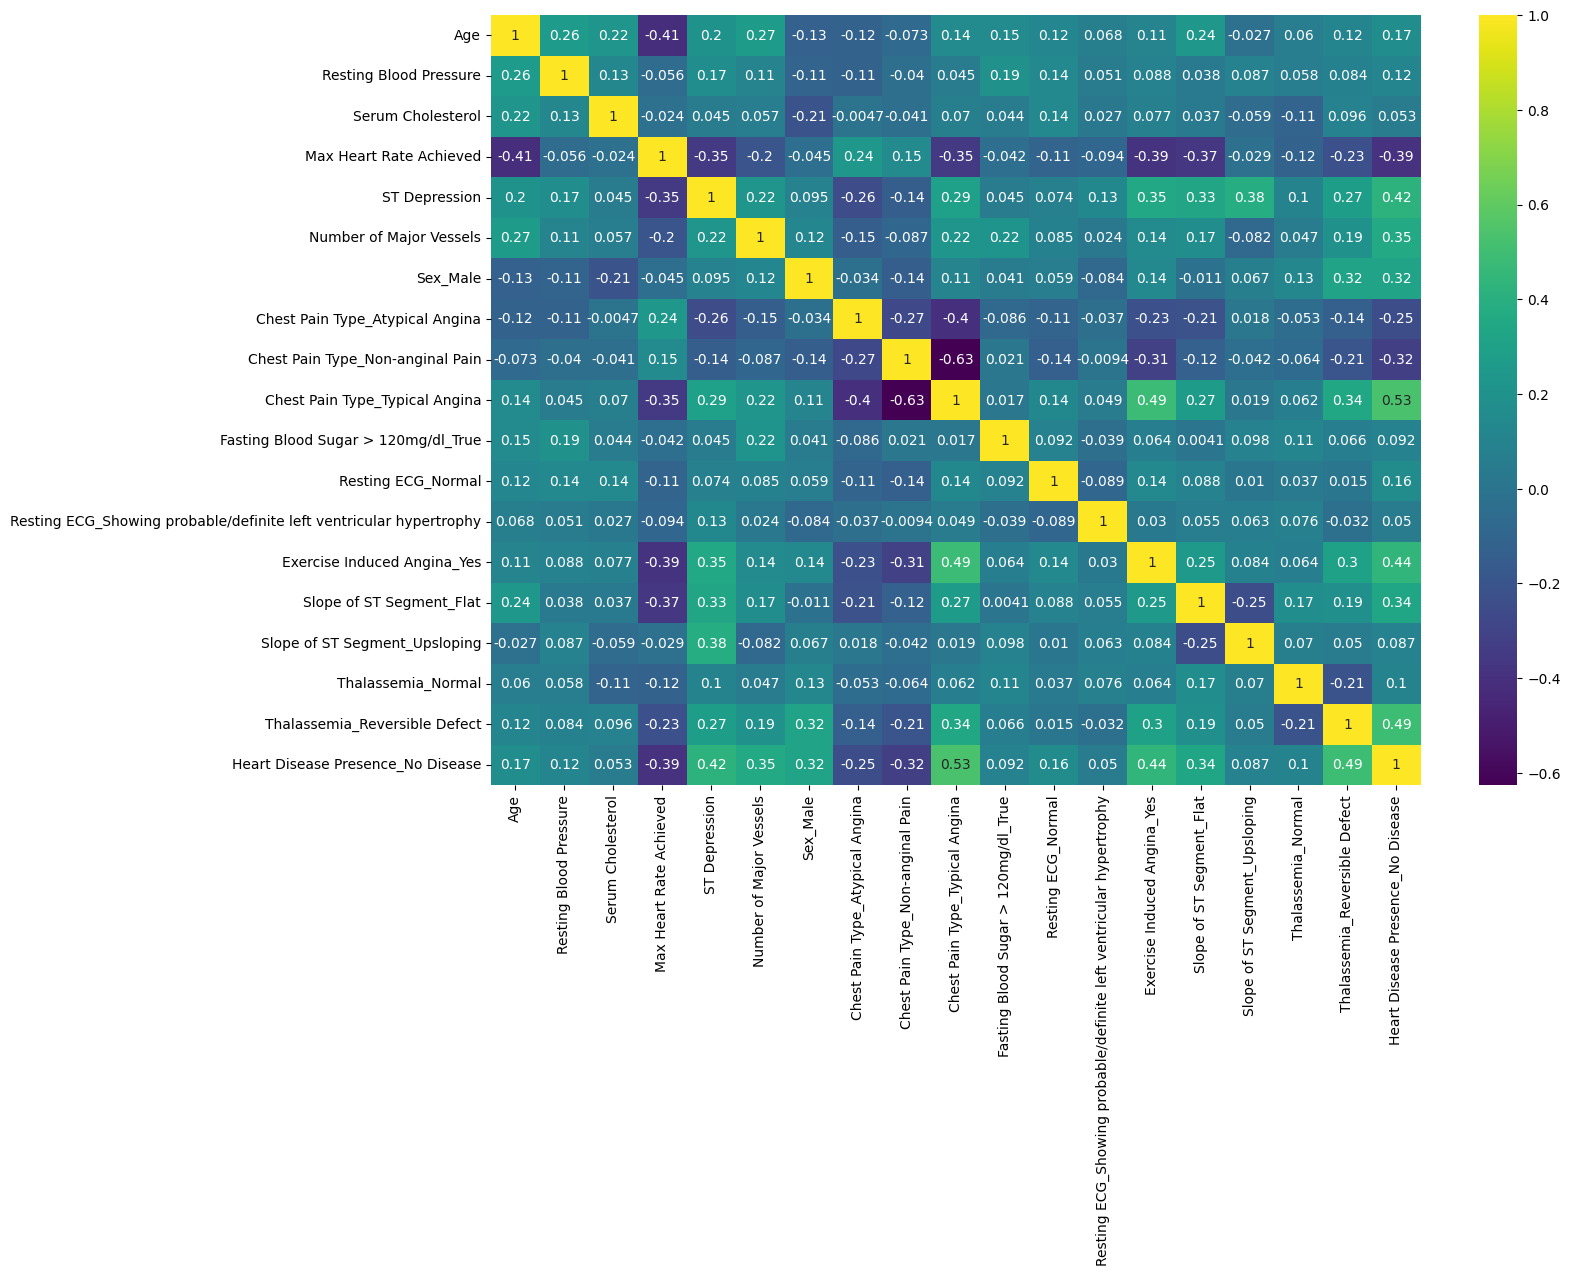

In [12]:
#correlation matrix
cor=data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()

In [23]:
 # separate variables X and Y,
X=data.drop('Heart Disease Presence_No Disease',axis='columns')
Y=data['Heart Disease Presence_No Disease']

In [24]:
# split data set into training and testing parts
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
#checking size of training and testing data
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

400
100
400
100


In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Logistic Regression

In [27]:
M1=LogisticRegression(max_iter=2000)
M1.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=2000)

In [28]:
M1.score(X_test_scaled, Y_test)

0.81

In [29]:
Y_pred1 = M1.predict(X_test_scaled)

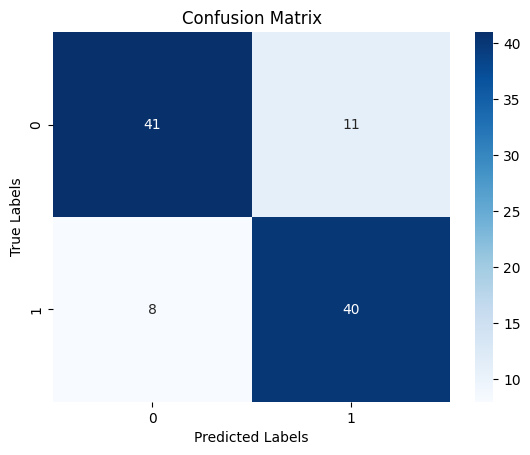

In [30]:
cm1 = confusion_matrix(Y_test, Y_pred1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
classification_report(Y_test, Y_pred1)

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.79      0.81        52\n         1.0       0.78      0.83      0.81        48\n\n    accuracy                           0.81       100\n   macro avg       0.81      0.81      0.81       100\nweighted avg       0.81      0.81      0.81       100\n'

#Support Vector Machine

In [32]:
from sklearn.svm import SVC
M2 = SVC()
M2.fit(X_train_scaled, Y_train)

SVC()

In [33]:
M2.score(X_test_scaled, Y_test)

0.86

In [34]:
Y_pred2 = M2.predict(X_test_scaled)

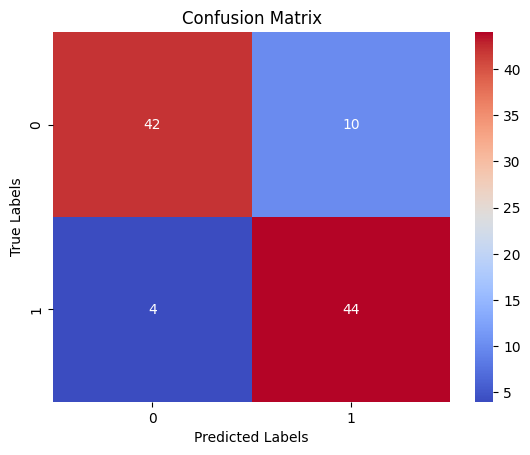

In [35]:
cm2 = confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
classification_report(Y_test, Y_pred2)

'              precision    recall  f1-score   support\n\n         0.0       0.91      0.81      0.86        52\n         1.0       0.81      0.92      0.86        48\n\n    accuracy                           0.86       100\n   macro avg       0.86      0.86      0.86       100\nweighted avg       0.87      0.86      0.86       100\n'

#Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
M3 = DecisionTreeClassifier()
M3.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [38]:
M3.score(X_test_scaled, Y_test)

0.82

In [39]:
Y_pred3 = M3.predict(X_test_scaled)

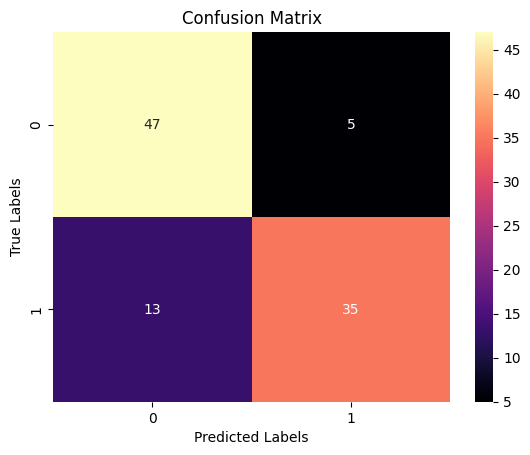

In [40]:
cm3 = confusion_matrix(Y_test, Y_pred3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
classification_report(Y_test, Y_pred3)

'              precision    recall  f1-score   support\n\n         0.0       0.78      0.90      0.84        52\n         1.0       0.88      0.73      0.80        48\n\n    accuracy                           0.82       100\n   macro avg       0.83      0.82      0.82       100\nweighted avg       0.83      0.82      0.82       100\n'

#Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
M4 = RandomForestClassifier()
M4.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [43]:
M4.score(X_test_scaled, Y_test)

0.89

In [44]:
Y_pred4 = M4.predict(X_test_scaled)

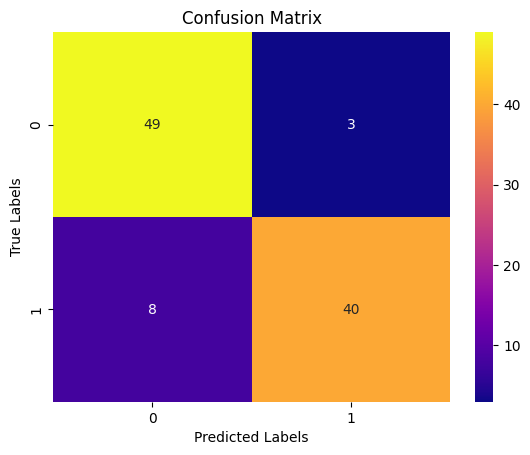

In [45]:
cm4 = confusion_matrix(Y_test, Y_pred4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [46]:
classification_report(Y_test, Y_pred4)

'              precision    recall  f1-score   support\n\n         0.0       0.86      0.94      0.90        52\n         1.0       0.93      0.83      0.88        48\n\n    accuracy                           0.89       100\n   macro avg       0.89      0.89      0.89       100\nweighted avg       0.89      0.89      0.89       100\n'

## 📊 Model Comparison and Conclusion

In this project, we built and evaluated four different machine learning models to predict the presence of heart disease based on patient data:

| Model                   | Accuracy Score |
|--------------------------|----------------|
| Logistic Regression      | 81%             |
| Support Vector Machine   | 86%             |
| Decision Tree Classifier | 82%             |
| Random Forest Classifier | 89%             |

### 📝 Observations:
- **Random Forest Classifier** achieved the highest accuracy (89%) among all models.
- **Decision Tree Classifier ** and **Support Vector Machine** also performed well with accuracies above 80%.
- **Logistic Regression** provided a baseline model with reasonable accuracy but slightly lower than the tree-based models.

### 📈 Insights:
- Tree-based models (Decision Tree, Random Forest) performed better, possibly because they can capture complex non-linear relationships in the dataset without requiring feature scaling (though scaling was applied for fairness).
- Support Vector Machine also performed well but may require further tuning of hyperparameters (like `C`, `gamma`, and kernel type) for better precision and recall balance.

### ✅ Conclusion:
- Based on the results, **Decision Tree Classifier** can be selected as the best model for this dataset.
- However, further improvements can be made by:
  - Applying **hyperparameter tuning** (e.g., using `GridSearchCV`).
  - Performing **cross-validation** to ensure model robustness.
  - Exploring **ensemble methods** like Gradient Boosting or XGBoost for even better performance.

### 🚀 Future Work:
- Tune hyperparameters of the best-performing models.
- Use techniques like **feature selection** to improve model generalization.
- Deploy the final model as a simple web app to assist healthcare professionals in early heart disease detection.
